# Prediction of Heart Disease using Machine Learning

Data Set has been downloaded from Kaggle Website. URL: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease. This dataset contains information on the 2020 annual heart disease survey data related to their health status. About Dataset: --------It contains 18 Columns and 18 variables (9 Booleans, 5 strings, and 4 decimals)

## 1. Importing Dataset

In [88]:
#import pandas to read the raw data csv file to a dataframe
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [89]:
# Reading the raw dataset 
HeartData = pd.read_csv('../icaML/heart_Diseases_cleaned.csv')
# To understand the number of rows and columns in the dataset
HeartData.shape

(319795, 18)

In [90]:
# Printing the first 6 rows of the dataset
num_features = [feature for feature in HeartData.columns if HeartData[feature].dtype != 'O']
HeartData[num_features].head()
HeartData.head()


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [5]:
# Printing the last 6 rows of the dataset
HeartData.tail()


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No
319794,No,46.56,No,No,No,0.0,0.0,No,Female,80 or older,Hispanic,No,Yes,Good,8.0,No,No,No


In [6]:
# min, max count avg and percentile details of each column 
HeartData.describe()


,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [7]:
# To understand the data types of the column data
HeartData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

### Checking Null Values

In [8]:
import missingno as msno

<AxesSubplot:>

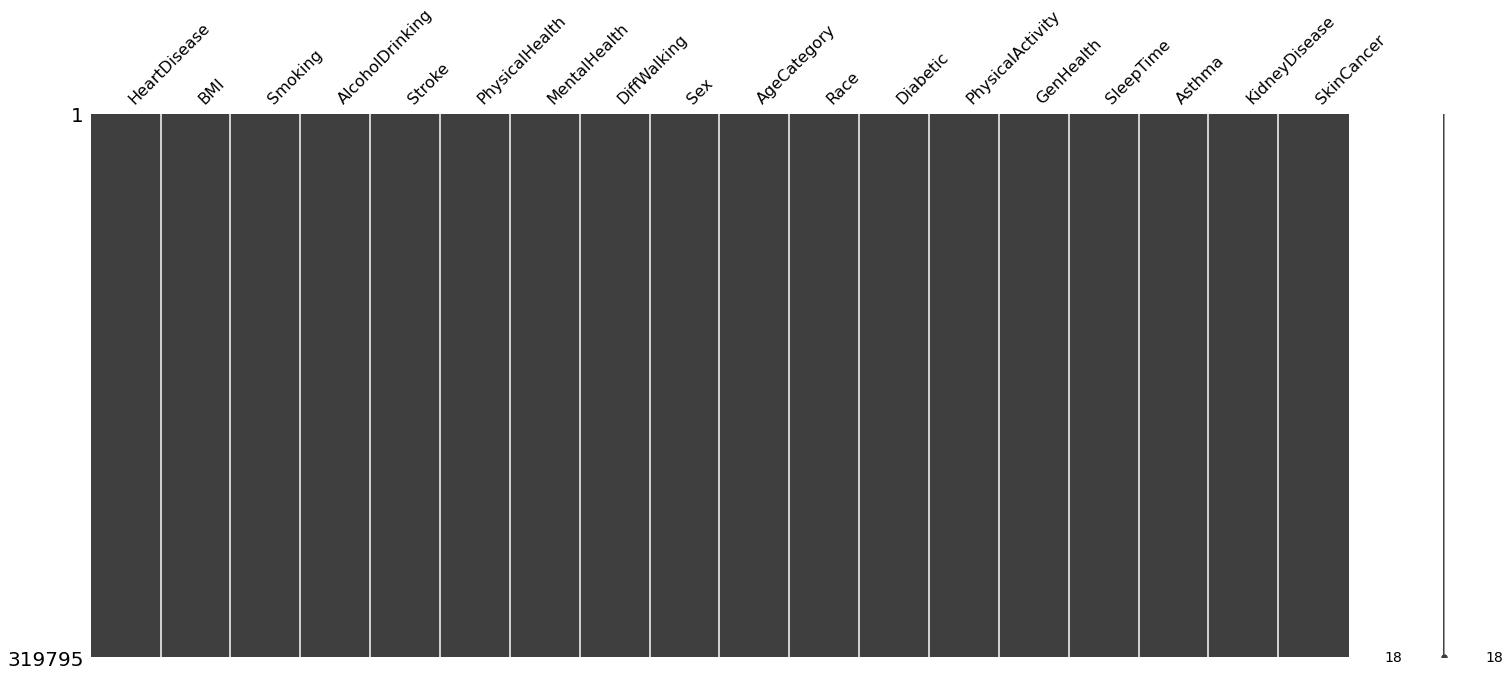

In [75]:
#Checking the null values in the dataset

msno.matrix(HeartData)

### 
from head and tail values of dataset we could only see None values in holiday colum
printing the unique values in the dataset
HeartData['HeartDisease'].unique()


## 2. Exploratory Data Analysis and Visualisation


#####   
The dataset consists of 319796 rows and 18 columns. The column names and column values are shown below.

### 2.1 UniVarient Analysis


### Age Category

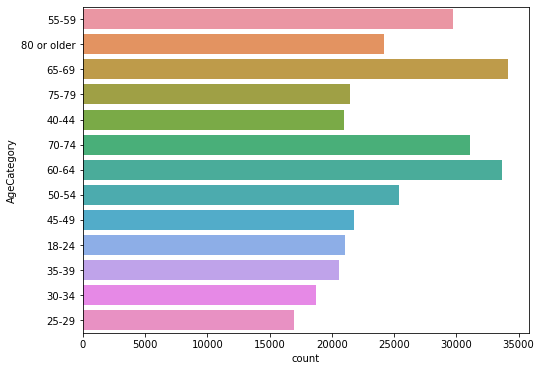

In [10]:
import matplotlib.pyplot as plt
#visualising non None values in holiday column 
AgeCategory = HeartData.loc[HeartData.AgeCategory != 'None']
plt.figure(figsize=(8,6))
sns.countplot(y='AgeCategory', data= AgeCategory)
plt.show()


In [11]:
# shape and count of data with AgeCategory
AgeCategory.shape


(319795, 18)

### Heart Disease

In [12]:
# shape and count of HeartDisease (HeartDisease not None) 
NotHeartDisease = HeartData.loc[HeartData.HeartDisease == 'No']
HeartDisease = HeartData.loc[HeartData.HeartDisease=='Yes']

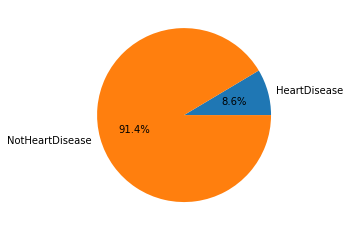

In [13]:
# comparing heartdiseases percentage
plt.pie([HeartDisease.shape[0] , NotHeartDisease.shape[0] ], labels= ['HeartDisease', 'NotHeartDisease'],autopct='%1.1f%%' )
plt.show()


####  
Heart Disease Column: People affected with Heart Diseases: 27374
People not affected with Heart Diseases: 292423
The data for not heart diseases is 91.4% and with heart disease is 8.6%.


### Sex

In [14]:
# shape and count of Sex (Sec not None) 
Female = HeartData.loc[HeartData.Sex == 'Female']
Male = HeartData.loc[HeartData.Sex=='Male']

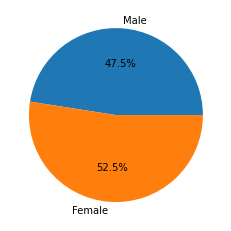

In [15]:
# comparing  sex percentage
plt.pie([Male.shape[0] , Female.shape[0] ], labels= ['Male', 'Female'],autopct='%1.1f%%' )
plt.show()

### BMI

In [16]:
# Analysing BMI Column
HeartData['BMI'].describe()


count    319795.000000
mean         28.325399
std           6.356100
min          12.020000
25%          24.030000
50%          27.340000
75%          31.420000
max          94.850000
Name: BMI, dtype: float64

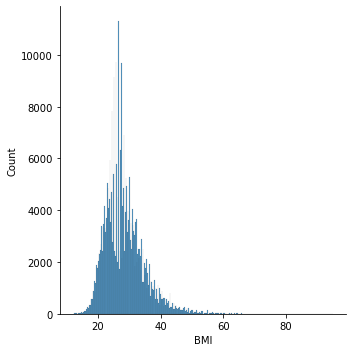

In [17]:
# visualising BMI distribution 
sns.displot(HeartData, x="BMI")

<AxesSubplot:>

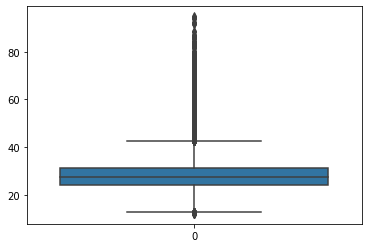

In [18]:
# boxplot for analysisng outliers if any 
sns.boxplot(data=HeartData['BMI'])


##### 
BMI Column: Body Mass Index (BMI) - data type is decimal
no outliers have been observed.
Observed BMI is more at 28.32%


### PhysicalHealth

In [19]:
#HeartData['PhysicalHealth'].value_counts()
HeartData['PhysicalHealth'].describe()


count    319795.00000
mean          3.37171
std           7.95085
min           0.00000
25%           0.00000
50%           0.00000
75%           2.00000
max          30.00000
Name: PhysicalHealth, dtype: float64

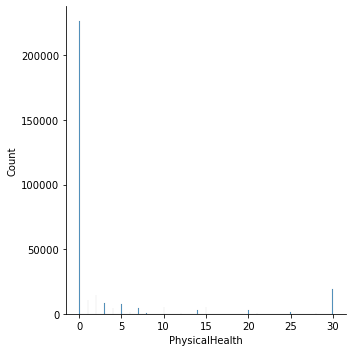

In [20]:
# visualising PhysicalHealth distribution 
sns.displot(HeartData, x="PhysicalHealth")

<AxesSubplot:>

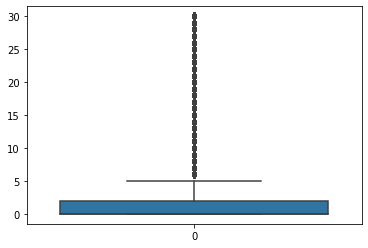

In [21]:
# boxplot for analysisng outliers if any 
sns.boxplot(data=HeartData['PhysicalHealth'])


#####  
Physical Health Column- The data type is “numeric”.
no Outliers have been observed
Now thinking about physical health, which includes physical illness from the past 30 days is more at ‘0’ which means many people are not affected.


### Stroke

In [22]:
#HeartData['Stroke'].value_counts()
HeartData['Stroke'].describe()



count     319795
unique         2
top           No
freq      307726
Name: Stroke, dtype: object

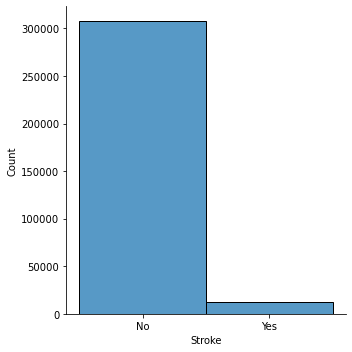

In [23]:
# visualising Stroke distribution 
sns.displot(HeartData, x="Stroke")


#####  
Stroke Column—The data type is String which is supposed to change to Binary
It is observed that many people don’t have Strokes.


### MentalHealth

In [24]:
#percentage of cloud cover - categorical variable 
HeartData['MentalHealth'].describe()


count    319795.000000
mean          3.898366
std           7.955235
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max          30.000000
Name: MentalHealth, dtype: float64

C:\Users\Malyala Varaprasad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


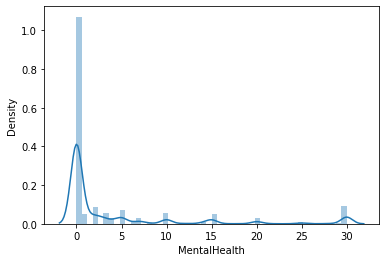

In [25]:
#MentalHealth indicates the person's MentalHealth 
sns.distplot(HeartData['MentalHealth'])
plt.show()


C:\Users\Malyala Varaprasad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MentalHealth'>

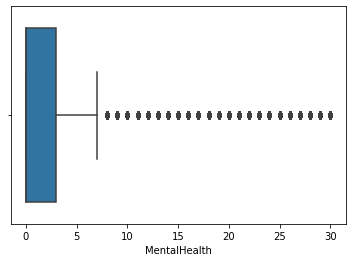

In [26]:
# visualising MentalHealth distribution 
sns.boxplot(HeartData['MentalHealth'])


####  
Mental health Column - Data type is numeric
Outliers have been observed.
Thinking about Mental Health people who don’t have affected any mental illness is more from the past 30 days.


### Race

In [27]:
HeartData['Race'].value_counts()


White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Race'>

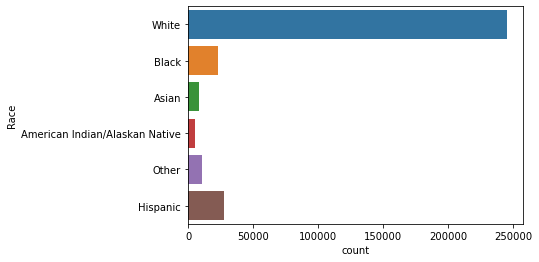

In [28]:
sns.countplot(y='Race', data=HeartData)


Race Column- data type is a string that is supposed to be changed to numeric.
Observed many people who got affected with heart diseases are from the White Race.


### SleepTime

C:\Users\Malyala Varaprasad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


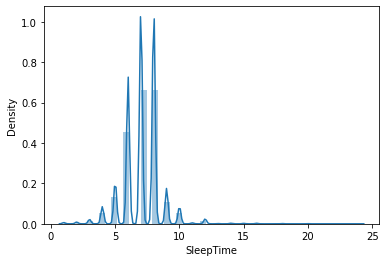

In [29]:
#HeartData['SleepTime'].value_counts()
sns.distplot(HeartData['SleepTime'])
plt.show()

Sleep Time Column – data type is numeric
Observed that many people sleep more than 8 hours.


### GenHealth

In [30]:
HeartData['GenHealth'].value_counts()

Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64

<AxesSubplot:xlabel='count', ylabel='GenHealth'>

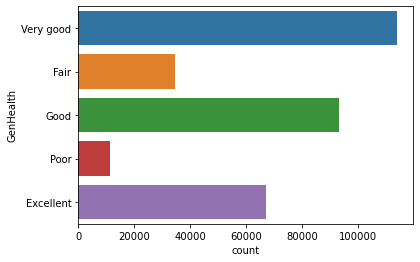

In [31]:
sns.countplot(y='GenHealth', data=HeartData)

# 
Gen Health Column – Data type is a string
Observed that General health is quite important very fewer people don’t have good health.


### 2.2 MultiVarient Analysis

### Matrix Scatterplot
Matrix scatterplot will show the way multiple variables how are related. Outliers in multiple scatter plots can also be identified by this matrix.


### Analysing Columns against Heart Disease Column

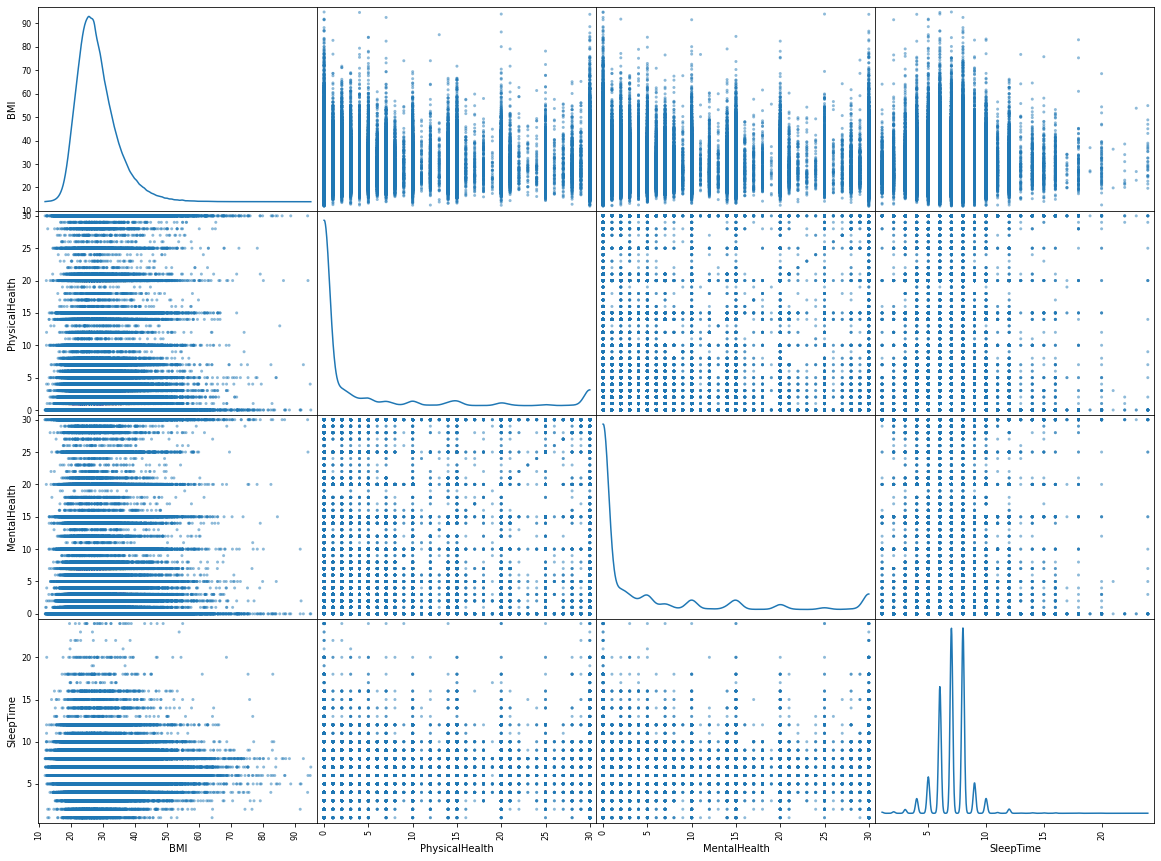

In [35]:
pd.plotting.scatter_matrix(HeartData.loc[:, "BMI":"SkinCancer"], diagonal="kde",figsize=(20,15))
plt.show()

### Profile Plot
Profile plot, showing the variation in each of variables, plots the value of each variable for each sample


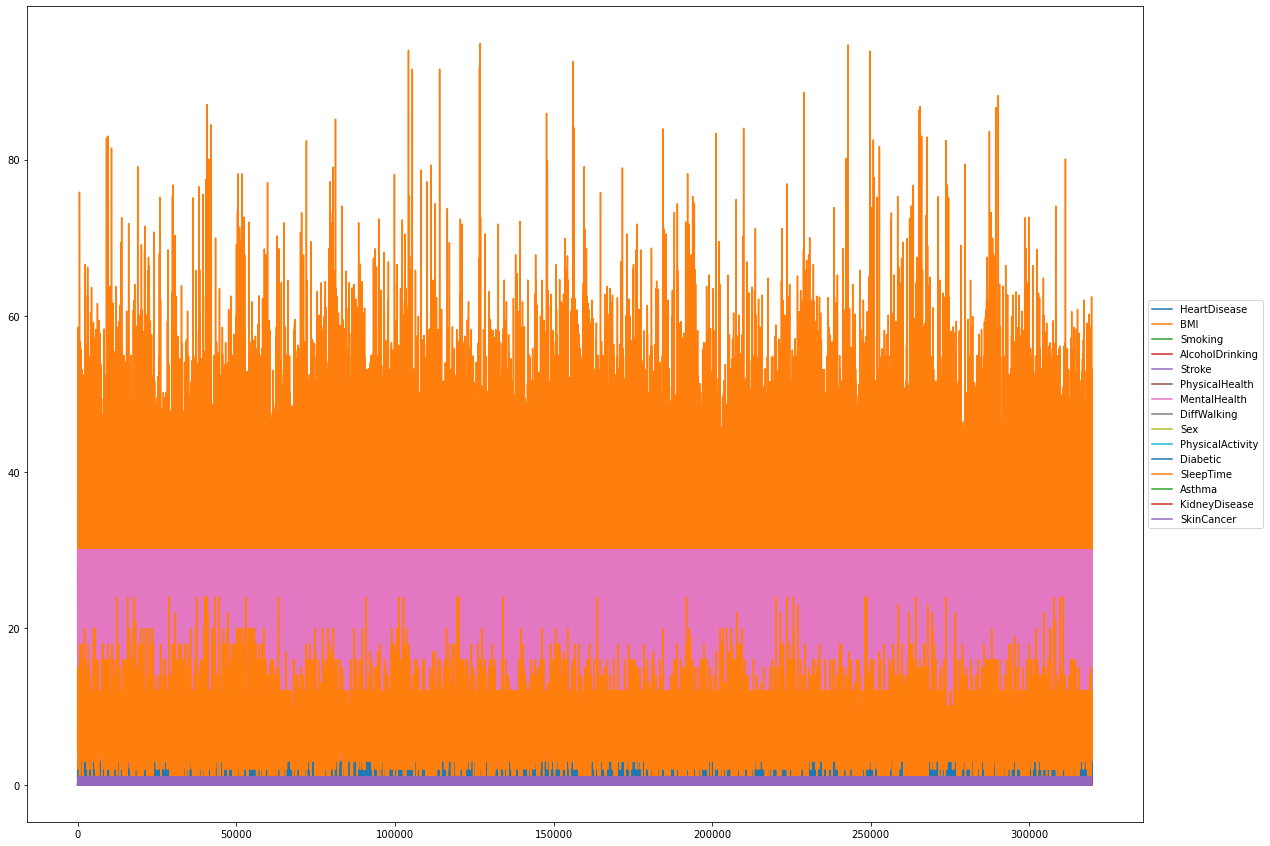

In [263]:
ax = HeartData[["HeartDisease","BMI","Smoking","AlcoholDrinking","Stroke","PhysicalHealth","MentalHealth","DiffWalking","Sex","PhysicalActivity","Diabetic","SleepTime","Asthma","KidneyDisease","SkinCancer"]].plot(figsize=(20,15))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

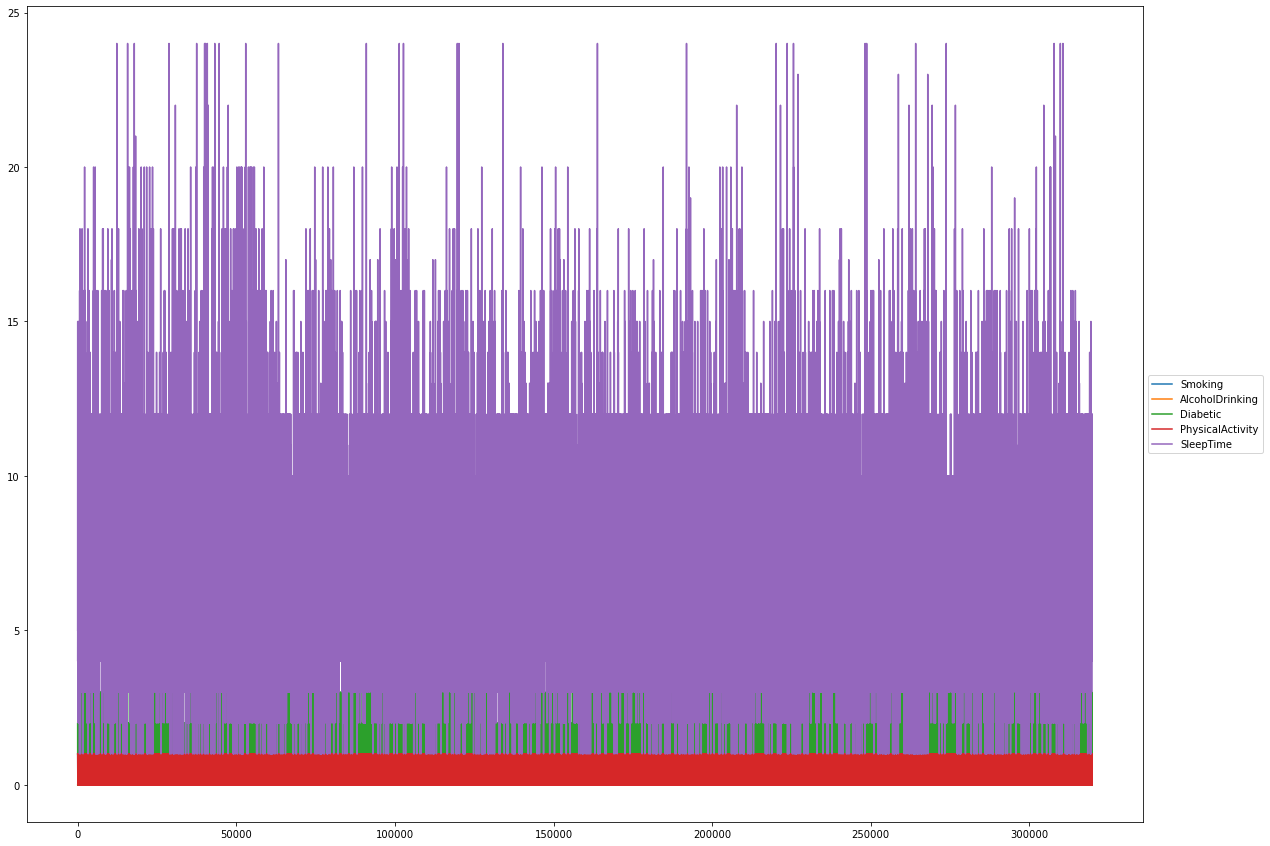

In [264]:
ax = HeartData[["Smoking","AlcoholDrinking","Diabetic","PhysicalActivity","SleepTime"]].plot(figsize=(20,15))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

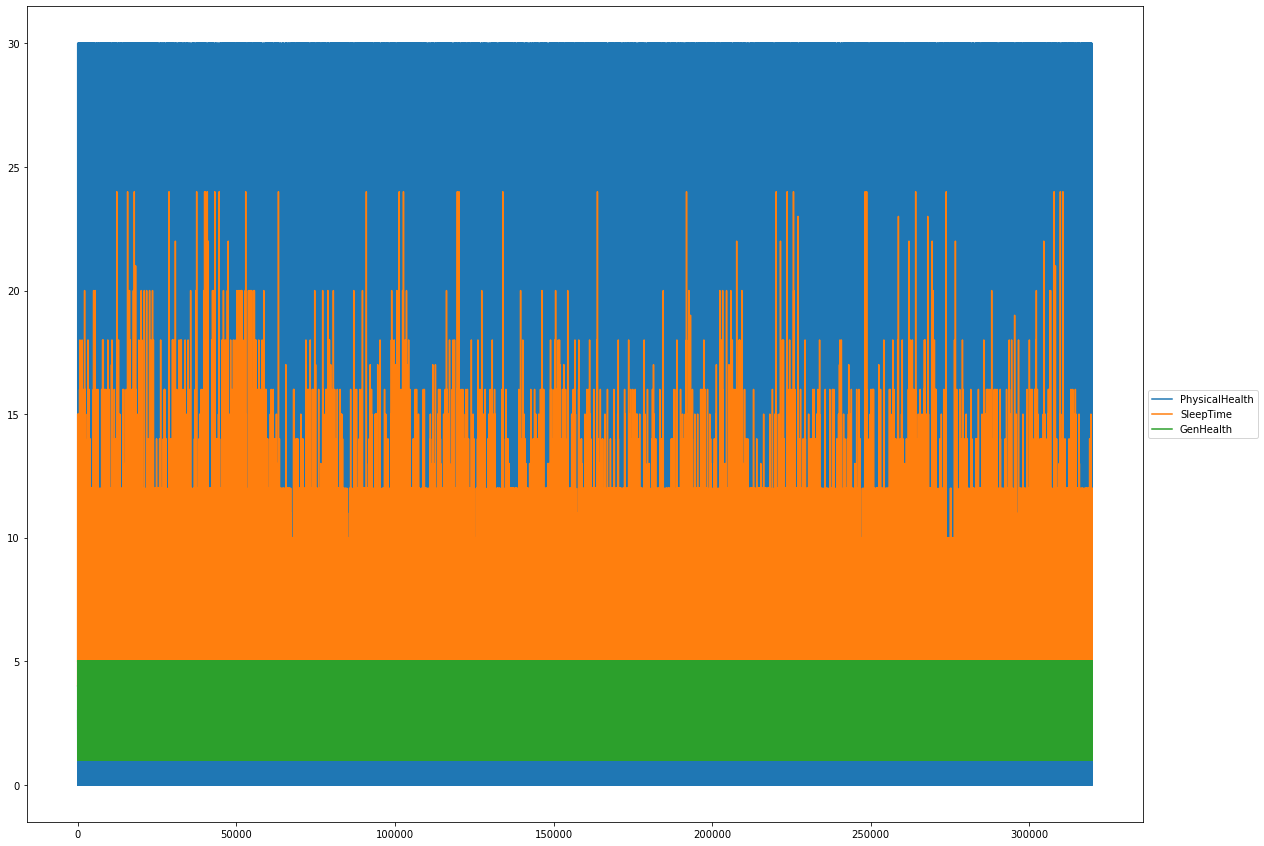

In [147]:
ax = data[["PhysicalHealth","SleepTime","GenHealth"]].plot(figsize=(20,15))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [83]:
#To understand mean of each column
X.apply(np.mean)

BMI                 28.325399
Smoking              0.412477
AlcoholDrinking      0.068097
Stroke               0.037740
PhysicalHealth       3.371710
MentalHealth         3.898366
DiffWalking          0.138870
Sex                  0.475273
AgeCategory          7.514536
Race                 0.514048
Diabetic             0.194002
PhysicalActivity     0.775362
GenHealth            3.595028
SleepTime            7.097075
Asthma               0.134061
KidneyDisease        0.036833
SkinCancer           0.093244
dtype: float64

## Research Question:
The Vital aim of this research is to build a machine learning model and analyze the higher accuracy to predict Heart diseases worldwide. As the data consists of Independent and dependent variables regression analysis is performed.


## Data  Pre-Processing

In [33]:
HeartData = HeartData.replace('Yes', 1)
HeartData = HeartData.replace('No', 0)

In [34]:
HeartData['Sex'] = HeartData['Sex'].replace(['Female', 'Male'], [0, 1])

Converting all the string data (“Yes/No”) into Boolean.

In [35]:
age_category_map = {
    '18-24': 1,
    '25-29': 2,
    '30-34': 3,
    '35-39': 4,
    '40-44': 5,
    '45-49': 6,
    '50-54': 7,
    '55-59': 8,
    '60-64': 9,
    '65-69': 10,
    '70-74': 11,
    '75-79': 12,
    '80 or older': 13
}

In [36]:
HeartData['AgeCategory'] = HeartData['AgeCategory'].map(age_category_map).round(0)

Categorizing all the age categories by giving numeric 

In [37]:
race_map = {
    'White': 0,
    'Hispanic': 1,
    'Black': 2,
    'Other': 3,
    'Asian': 4,
    'American Indian/Alaskan Native': 5
}

In [38]:
HeartData['Race'] = HeartData['Race'].map(race_map).round(0).astype(int)

Categorizing all the General Health categories which are in String data type by processing to numeric.

In [39]:
gen_health_map = {
    'Poor': 1,
    'Fair': 2,
    'Good': 3,
    'Very good': 4,
    'Excellent': 5
}

HeartData['GenHealth'] = HeartData['GenHealth'].map(gen_health_map).round(0).astype(int)

In [40]:
HeartData.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,8,0,1,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,13,0,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,10,0,1,1,2,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,12,0,0,0,3,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,5,0,0,1,4,8.0,0,0,0


In [41]:
HeartData.dtypes

HeartDisease          int64
BMI                 float64
Smoking               int64
AlcoholDrinking       int64
Stroke                int64
PhysicalHealth      float64
MentalHealth        float64
DiffWalking           int64
Sex                   int64
AgeCategory           int64
Race                  int32
Diabetic             object
PhysicalActivity      int64
GenHealth             int32
SleepTime           float64
Asthma                int64
KidneyDisease         int64
SkinCancer            int64
dtype: object

In [42]:
HeartData['Diabetic'].value_counts()

0                          269653
1                           40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: Diabetic, dtype: int64

In [43]:
HeartData['Diabetic'] = HeartData['Diabetic'].replace(['No, borderline diabetes', 'Yes (during pregnancy)'], [2,3])

In [44]:
HeartData['Diabetic'] = HeartData['Diabetic'].astype('int8')

In [45]:
HeartData.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.085595,28.325399,0.412477,0.068097,0.037740,3.37171,3.898366,0.138870,0.475273,7.514536,0.514048,0.194002,0.775362,3.595028,7.097075,0.134061,0.036833,0.093244
std,0.279766,6.356100,0.492281,0.251912,0.190567,7.95085,7.955235,0.345812,0.499389,3.564759,1.107419,0.496776,0.417344,1.042918,1.436007,0.340718,0.188352,0.290775
min,0.000000,12.020000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,24.030000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,1.000000,3.000000,6.000000,0.000000,0.000000,0.000000
50%,0.000000,27.340000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,1.000000,4.000000,7.000000,0.000000,0.000000,0.000000
75%,0.000000,31.420000,1.000000,0.000000,0.000000,2.00000,3.000000,0.000000,1.000000,10.000000,0.000000,0.000000,1.000000,4.000000,8.000000,0.000000,0.000000,0.000000
max,1.000000,94.850000,1.000000,1.000000,1.000000,30.00000,30.000000,1.000000,1.000000,13.000000,5.000000,3.000000,1.000000,5.000000,24.000000,1.000000,1.000000,1.000000


In [46]:
HeartData.to_csv ('../icaML/Processed.csv',index = False, header=True)

## Data Visualisation

In [91]:
HeartData = pd.read_csv('../icaML/processed.csv')
HeartData.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,8,0,1,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,13,0,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,10,0,1,1,2,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,12,0,0,0,3,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,5,0,0,1,4,8.0,0,0,0


## Histogram

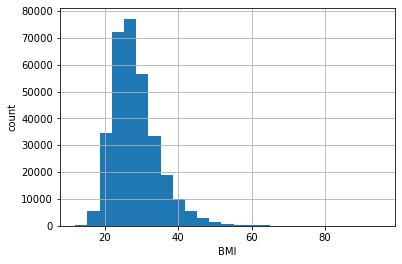

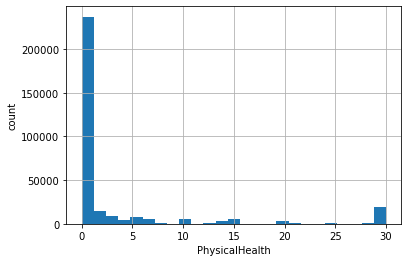

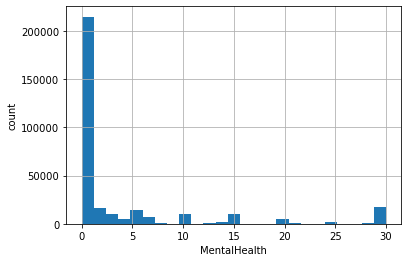

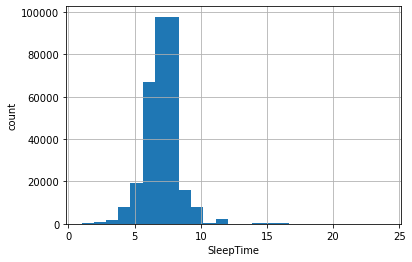

In [48]:
for feature in num_features:
    data = HeartData.copy()
    
    data[feature].hist(bins = 25)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.show()

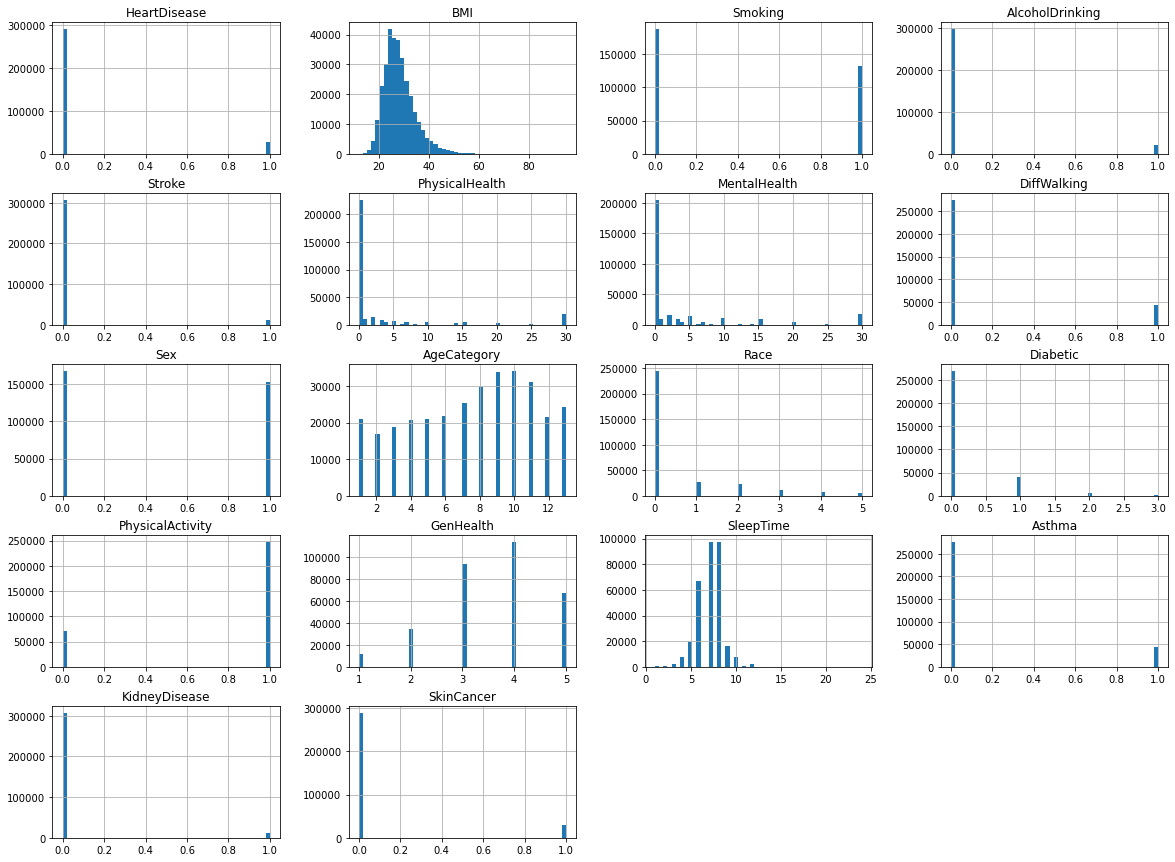

In [32]:
get_ipython().run_line_magic('matplotlib','inline')
HeartData.hist(bins=50, figsize=(20,15))
plt.savefig('../icaML/histograms.png')
plt.show()

## HeatMap

### Correlation Heat Map:
A graphical representation of a correlation matrix that represents the correlation between different variables is a correlation heat map.


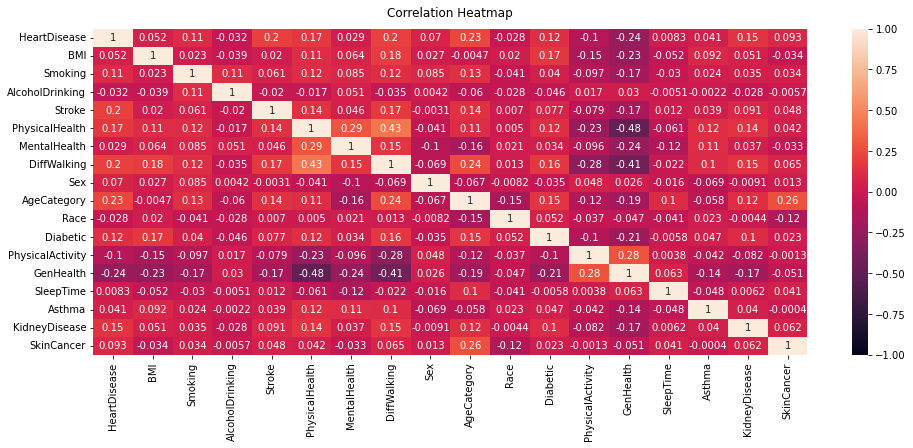

In [92]:
cor = HeartData.corr()
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(cor, vmin=-1,vmax=1,annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

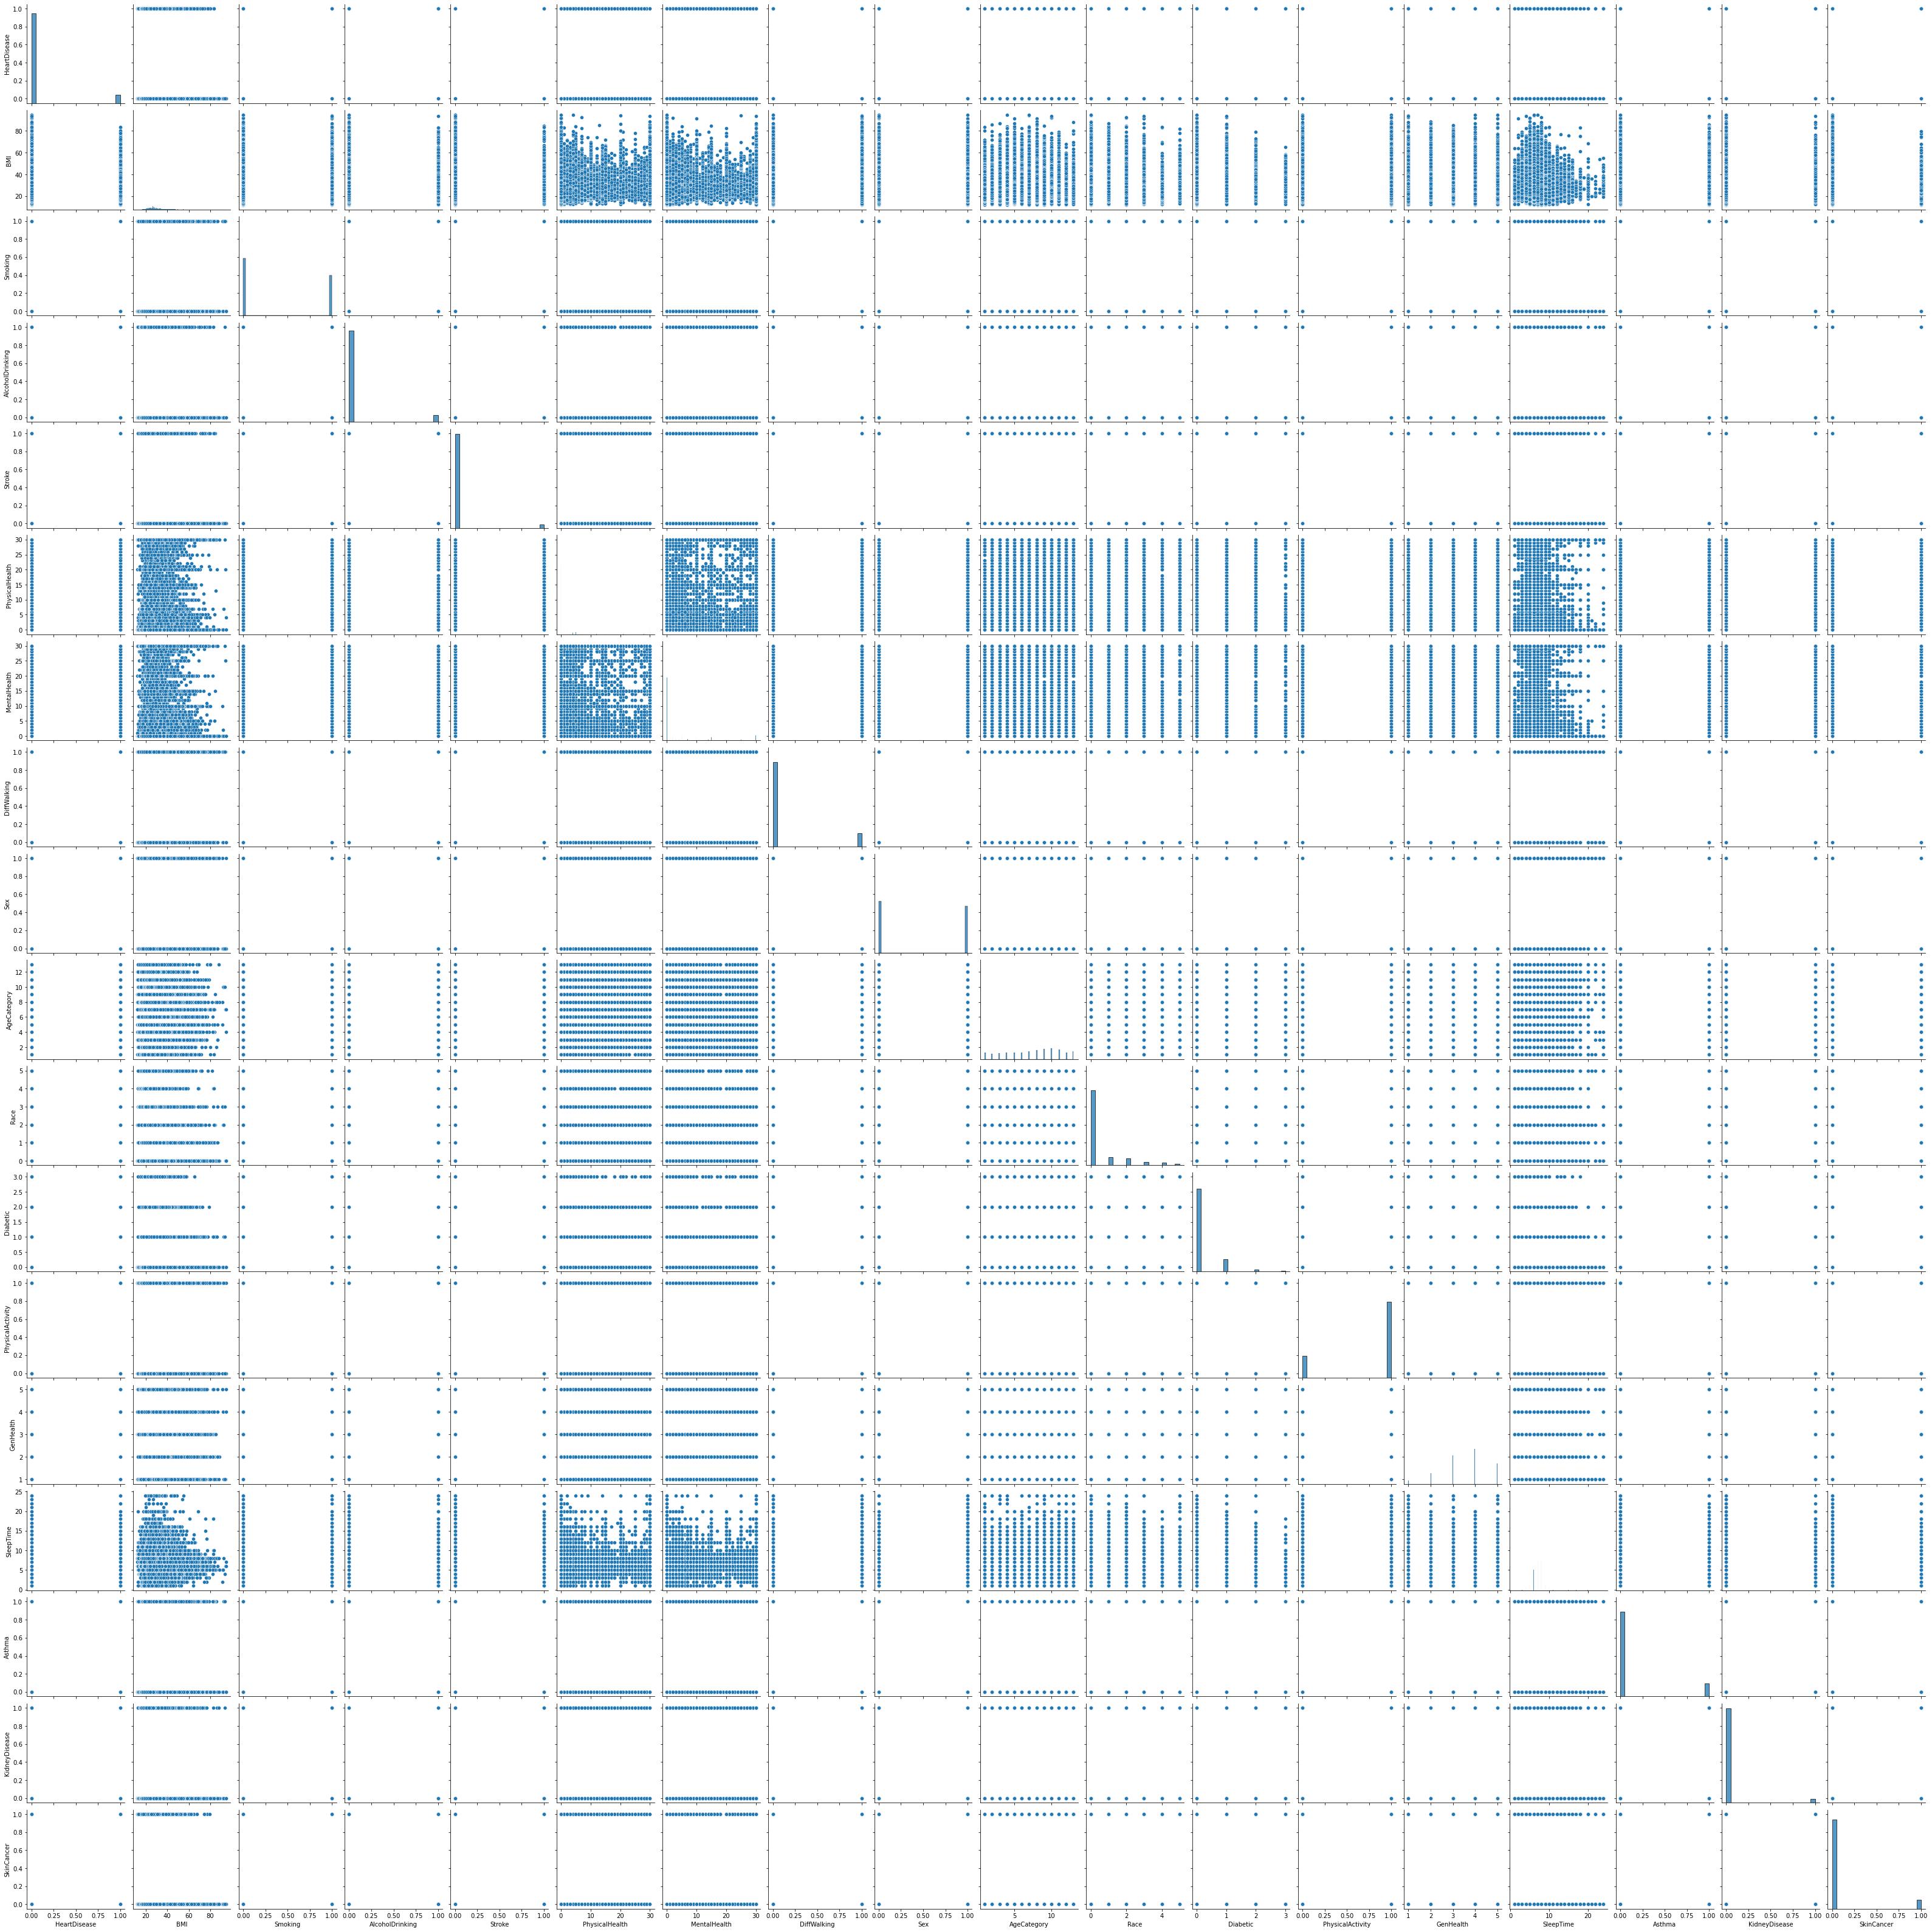

In [33]:
sns.pairplot(HeartData)
plt.savefig('../icaML/pairplot.png')


## Data Splitting

In [93]:
y = HeartData['HeartDisease']

In [94]:
X = HeartData.drop('HeartDisease', axis=1)

In [95]:
X.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,1,0,0,3.0,30.0,0,0,8,0,1,1,4,5.0,1,0,1
1,20.34,0,0,1,0.0,0.0,0,0,13,0,0,1,4,7.0,0,0,0
2,26.58,1,0,0,20.0,30.0,0,1,10,0,1,1,2,8.0,1,0,0
3,24.21,0,0,0,0.0,0.0,0,0,12,0,0,0,3,6.0,0,0,1
4,23.71,0,0,0,28.0,0.0,1,0,5,0,0,1,4,8.0,0,0,0


In [96]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: HeartDisease, dtype: int64

In [97]:
y.value_counts()

0    292422
1     27373
Name: HeartDisease, dtype: int64

In [101]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split



## train-test Split and Scaling the Data

The entire heart disease dataset is split into the training set and testing set using the train_test_split package from sklearn. 

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Regression Analysis:
As we can see both independent Variable(X) and dependent variable(y) are linearly related then Regression analysis is performed. Whereas observations are independent for each variable and the output variable must be distributed equally to the input fixed variables.


## Logistic Regression

In [57]:
regressor = LogisticRegression()  
regressor.fit(X_train, y_train) #training the algorithm
y_pred = regressor.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))  
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


Accuracy: 0.9135227254960209


array([[57878,   489],
       [ 5042,   550]], dtype=int64)

The accuracy of the regression is 91%. 

Text(0.5, 257.44, 'Predicted label')

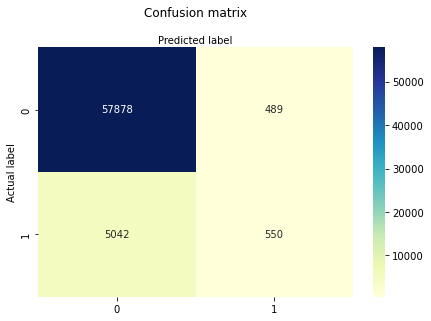

In [58]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Predicted 57878 people will not be affected by heart disease which is predicted correctly.
Expected that 489 people will get heart disease but it was predicted wrong. The expected 5042 people will not get heart disease but the prediction is incorrect. Expected 550 people will not get heart disease the prediction is correct.


## Decision Tree

In [59]:
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

Accuracy Score: 0.8622398724182679


array([[53731,  4636],
       [ 4175,  1417]], dtype=int64)

Accuracy is 86%

Text(0.5, 257.44, 'Predicted label')

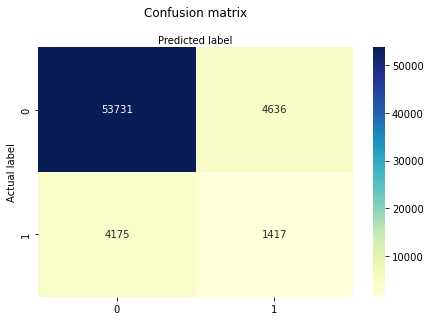

In [60]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Predicted 53771 people will not be affected by heart disease which is predicted correct.
Expected 4596 people will get heart disease but it was predicted wrong. Expected 4180 people will not get heart disease but the prediction is incorrect. Expected 1412 people will not get heart disease the prediction is correct.


## Naive Bayes

In [61]:
NaiveBayes = GaussianNB()
NaiveBayes.fit(X_train, y_train)
y_pred  =  classifier.predict(X_test)
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

Accuracy Score: 0.8622398724182679


array([[53731,  4636],
       [ 4175,  1417]], dtype=int64)

Accuracy is 86%

Text(0.5, 257.44, 'Predicted label')

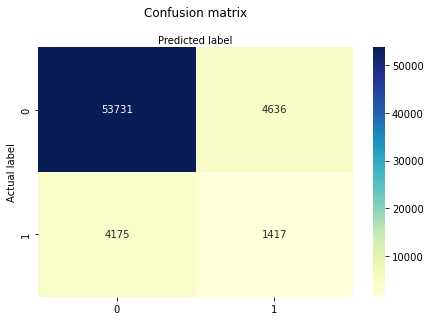

In [62]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Predicted 53771 people will not be affected by heart disease which is predicted correct. Expected 4596 people will get heart disease but it was predicted wrong. Expected 4180 people will not get heart disease but the prediction is incorrect. Expected 1412 people will not get heart disease the prediction is correct.

## Random Forest

In [63]:
Random = RandomForestClassifier(n_estimators=100)
Random.fit(X_train,y_train)
y_pred = Random.predict(X_test)
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

Accuracy Score: 0.904344970997045


array([[57167,  1200],
       [ 4918,   674]], dtype=int64)

Accuracy is 90%

Text(0.5, 257.44, 'Predicted label')

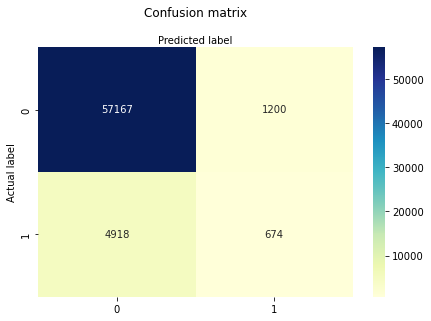

In [64]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Predicted 57167 people will not be affected by heart disease which is predicted correct. Expected 1200 people will get heart disease but it was predicted wrong. Expected 4918 people will not get heart disease but the prediction is incorrect. Expected 674 people will not get heart disease the prediction is correct.